In [8]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 import 하기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [93]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [95]:
df.loc[df['sex'] == 'female', 'sex'] = 0
df.loc[df['sex'] == 'male', 'sex'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df = df.astype({'sex' : int})
df = df.astype({'smoker' : int})
df['bmi'] = df['bmi'] // 5 * 5
df['age'] = df['age'] // 10 * 10
df

,age,sex,bmi,children,smoker,region,charges
0,10,0,25.0,0,1,southwest,16884.92400
1,10,1,30.0,1,0,southeast,1725.55230
2,20,1,30.0,3,0,southeast,4449.46200
3,30,1,20.0,0,0,northwest,21984.47061
4,30,1,25.0,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.0,3,0,northwest,10600.54830
1334,10,0,30.0,0,0,northeast,2205.98080
1335,10,0,35.0,0,0,southeast,1629.83350
1336,20,0,25.0,0,0,southwest,2007.94500


In [96]:
df_1 = df
df_1.loc[df_1['region'] == 'southwest', 'region'] = 0 # 웨스트 0, 이스트 1
df_1.loc[df_1['region'] == 'southeast', 'region'] = 1
df_1.loc[df_1['region'] == 'northwest', 'region'] = 0
df_1.loc[df_1['region'] == 'northeast', 'region'] = 1
df_1 = df_1.astype({'region':int})

In [97]:
df_2 = df
df_2.loc[df_2['region'] == 'southwest', 'region'] = 1 # 놀스 0, 사우스 1
df_2.loc[df_2['region'] == 'southeast', 'region'] = 1
df_2.loc[df_2['region'] == 'northwest', 'region'] = 0
df_2.loc[df_2['region'] == 'northeast', 'region'] = 0
df_2 = df_2.astype({'region':int})

In [98]:
for_dic = {
    'age' : [10, 20, 30, 40, 50, 60],
    'sex' : [0, 1],
    'bmi' : [15, 20, 25, 30, 35, 40, 45],
    'children' : [0, 1, 2, 3, 4],
    'smoker' : [0, 1],
    'region' : [0, 1]
}

- 나중에 클래스로 묶어보기

In [62]:
def corrplot1_1(a):
    for_list = [a]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        corrMatt = df_1_2.drop([for_list[0]], axis = 1).corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'1-{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/1-{for_list[0]}-{j}.png', dpi=100)

In [63]:
def corrplot1_2(a):
    for_list = [a]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        corrMatt = df_2_2.drop([for_list[0]], axis = 1).corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'1-{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/2-{for_list[0]}-{j}.png', dpi=100)

In [64]:
def corrplot2_1(a, b):
    for_list = [a, b]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            corrMatt = df_1_2_3.drop([for_list[0], for_list[1]], axis = 1).corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)

In [65]:
def corrplot2_2(a, b):
    for_list = [a, b]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_2_2_3 = df_2_2.loc[df[for_list[1]] == k]
            corrMatt = df_2_2_3.drop([for_list[0], for_list[1]], axis = 1).corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)

In [66]:
def corrplot3_1(a, b, c): # 웨스트 0, 이스트 1
    for_list = [a, b, c]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            for l in for_dic[for_list[2]]:
                df_1_2_3_4 = df_1_2_3.loc[df[for_list[2]] == l]
                corrMatt = df_1_2_3_4.drop([for_list[0], for_list[1], for_list[2]], axis = 1).corr()
                mask = np.array(corrMatt)
                mask[np.tril_indices_from(mask)]=False
                fig,ax = plt.subplots()
                fig.set_size_inches(20,10)
                plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}')
                sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}.png', dpi=100)

In [67]:
def corrplot3_2(a, b, c): # 놀스 0, 사우스 1
    for_list = [a, b, c]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_2_2_3 = df_2_2.loc[df[for_list[1]] == k]
            for l in for_dic[for_list[2]]:
                df_2_2_3_4 = df_2_2_3.loc[df[for_list[2]] == l]
                corrMatt = df_2_2_3_4.drop([for_list[0], for_list[1], for_list[2]], axis = 1).corr()
                mask = np.array(corrMatt)
                mask[np.tril_indices_from(mask)]=False
                fig,ax = plt.subplots()
                fig.set_size_inches(20,10)
                plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}')
                sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}.png', dpi=100)

In [68]:
def corrplot4_1(a, b, c, d): # 웨스트 0, 이스트 1
    for_list = [a, b, c, d]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            for l in for_dic[for_list[2]]:
                df_1_2_3_4 = df_1_2_3.loc[df[for_list[2]] == l]
                for m in for_dic[for_list[3]]:
                    df_1_2_3_4_5 = df_1_2_3_4.loc[df[for_list[3]] == m]
                    corrMatt = df_1_2_3_4_5.drop([for_list[0], for_list[1], for_list[2], for_list[3]], axis = 1).corr()
                    mask = np.array(corrMatt)
                    mask[np.tril_indices_from(mask)]=False
                    fig,ax = plt.subplots()
                    fig.set_size_inches(20,10)
                    plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}')
                    sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                    plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}.png', dpi=100)

In [69]:
def corrplot4_2(a, b, c, d): # 놀스0, 사우스1
    for_list = [a, b, c, d]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_2_2_3 = df_2_2.loc[df[for_list[1]] == k]
            for l in for_dic[for_list[2]]:
                df_2_2_3_4 = df_2_2_3.loc[df[for_list[2]] == l]
                for m in for_dic[for_list[3]]:
                    df_2_2_3_4_5 = df_2_2_3_4.loc[df[for_list[3]] == m]
                    corrMatt = df_2_2_3_4_5.drop([for_list[0], for_list[1], for_list[2], for_list[3]], axis = 1).corr()
                    mask = np.array(corrMatt)
                    mask[np.tril_indices_from(mask)]=False
                    fig,ax = plt.subplots()
                    fig.set_size_inches(20,10)
                    plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}')
                    sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                    plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}.png', dpi=100)

In [ ]:
corrplot3_2('smoker', 'age', 'bmi')

In [70]:
def regplot2_1(a, b): # 웨스트 0, 이스트 1
    for_list = [a, b]
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            fig, (ax1) = plt.subplots(ncols=1)
            fig.set_size_inches(12,5)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.regplot(x='bmi',y='charges',data = df_1_2_3,ax=ax1, line_kws={"color": "red"})
            plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)

In [71]:
def regplot2_2(a, b): # 웨스트 0, 이스트 1
    for_list = [a, b]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        for k in for_dic[for_list[1]]:
            df_2_2_3 = df_2_2.loc[df[for_list[1]] == k]
            fig, (ax1) = plt.subplots(ncols=1)
            fig.set_size_inches(12,5)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.regplot(x='bmi',y='charges',data = df_2_2_3,ax=ax1, line_kws={"color": "red"})
            plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)

In [ ]:
regplot2_1('smoker', 'age')

In [45]:
df_1.loc[(df_1['smoker'] == 0) & (df_1['age'] == 40) & (df_1['bmi'] >= 25) & (df_1['charges'] > 13000)]

,age,sex,bmi,children,smoker,region,charges
334,40,0,35.0,2,0,1,19144.57652
355,40,1,25.0,0,0,0,24603.04837
473,40,0,30.0,0,0,1,20878.78443
644,40,1,35.0,2,0,1,18806.14547
658,40,0,35.0,1,0,1,26392.26029
806,40,0,40.0,1,0,0,28476.73499
876,40,0,25.0,1,0,0,26140.36030
936,40,1,25.0,2,0,1,32108.66282
959,40,1,35.0,1,0,0,28468.91901
987,40,0,25.0,1,0,0,28340.18885


In [99]:
df_3 = df_1.loc[(df_1['smoker'] == 0) & (df_1['charges'] > 15000)]

In [104]:
def corrplot1_1_1(a): # 이상치 검사, 담배 x, charges가 15000이상일때
    for_list = [a]
    df_3.drop(['smoker'], axis=1, inplace=True)
    for j in for_dic[for_list[0]]:
        df_1_2 = df_3.loc[df[for_list[0]] == j]
        corrMatt = df_1_2.drop([for_list[0]], axis = 1).corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/{for_list[0]}-{j}.png', dpi=100)

C:\Users\405\AppData\Local\Temp\ipykernel_6972\3994714955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop(['smoker'], axis=1, inplace=True)


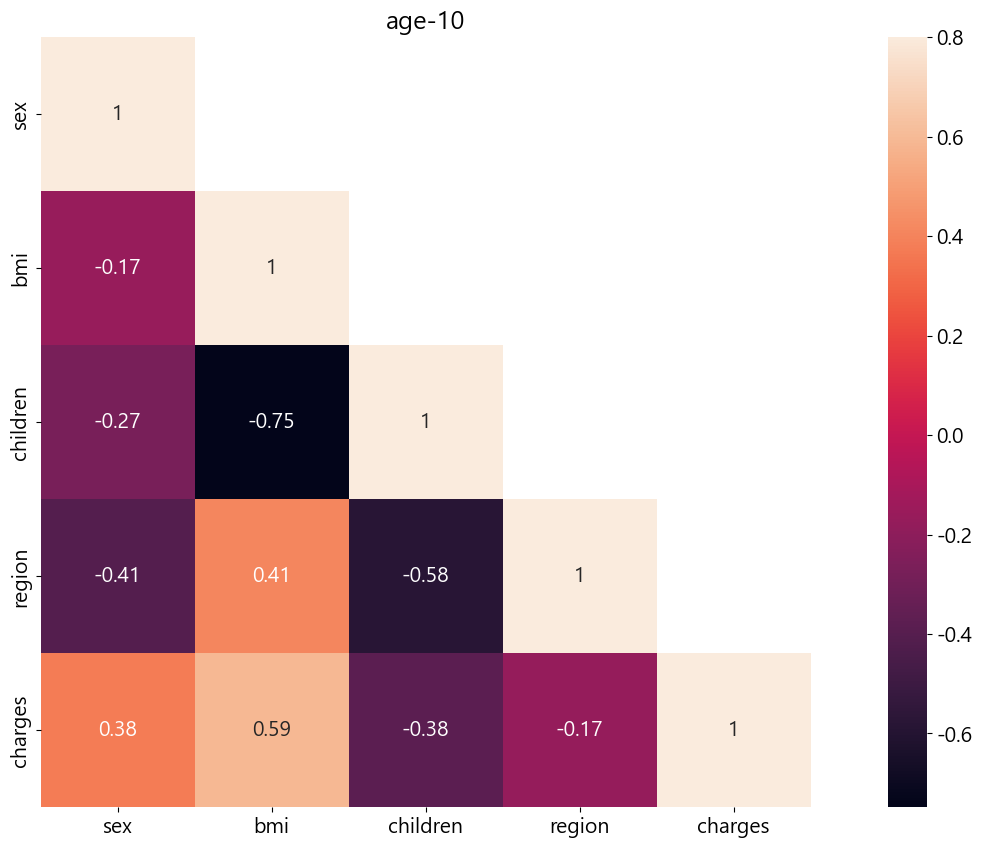

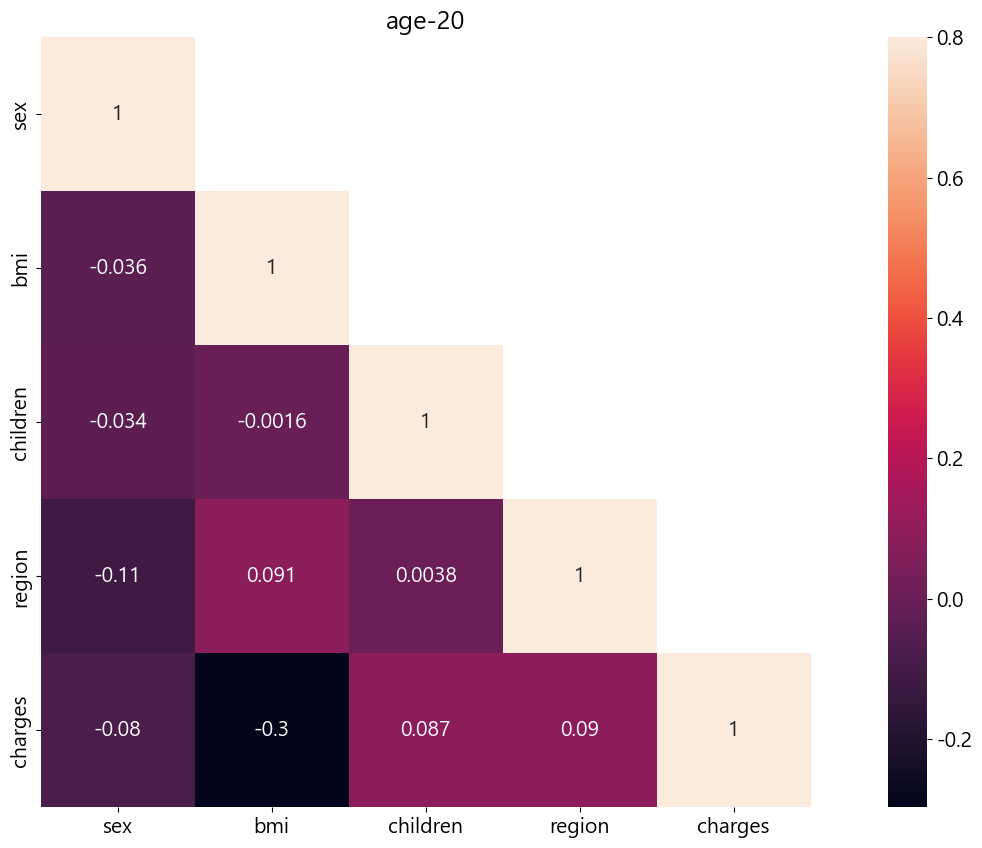

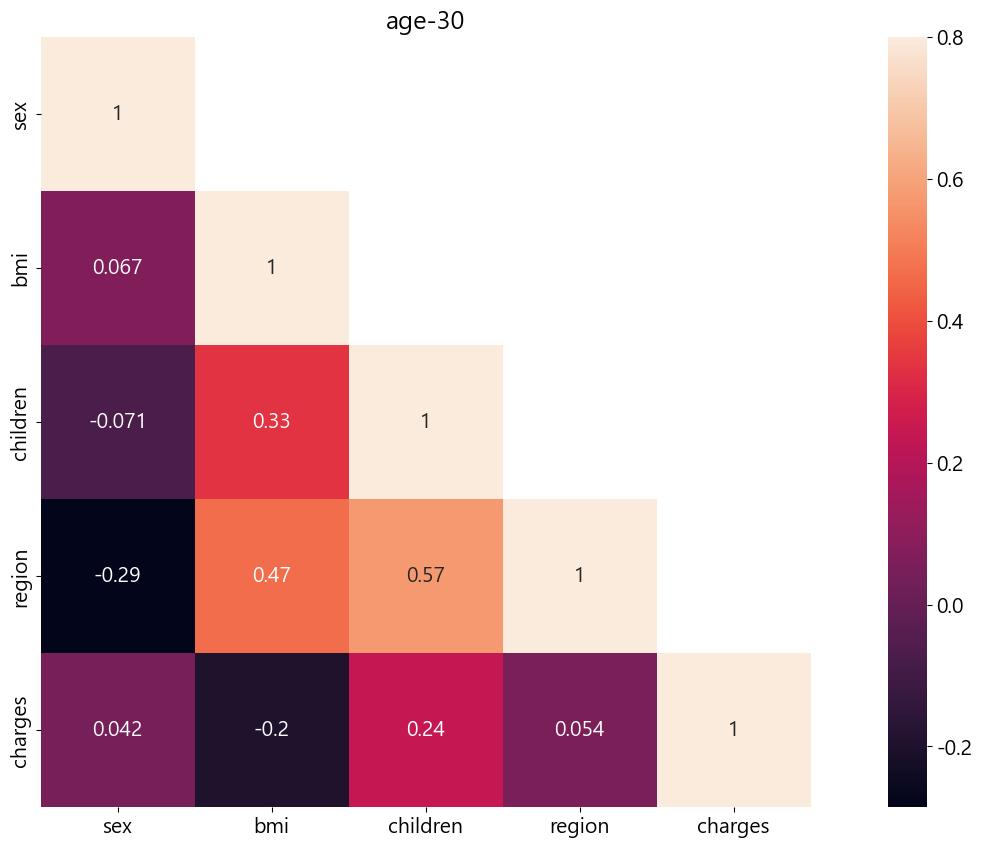

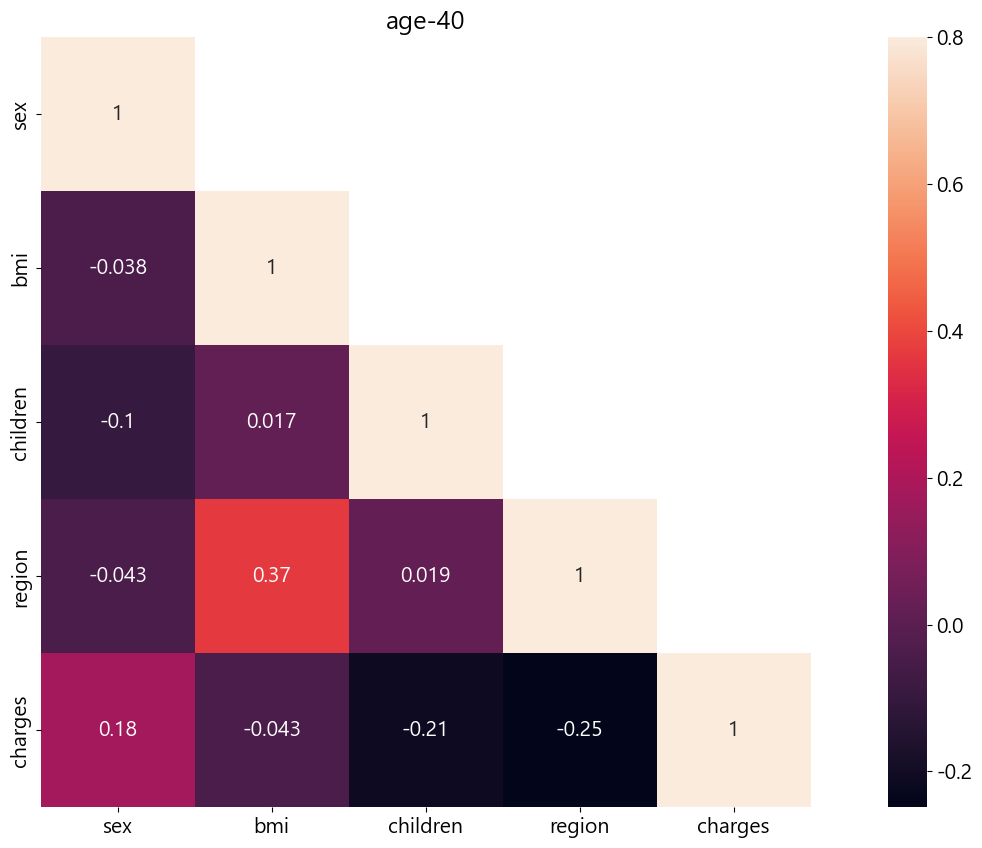

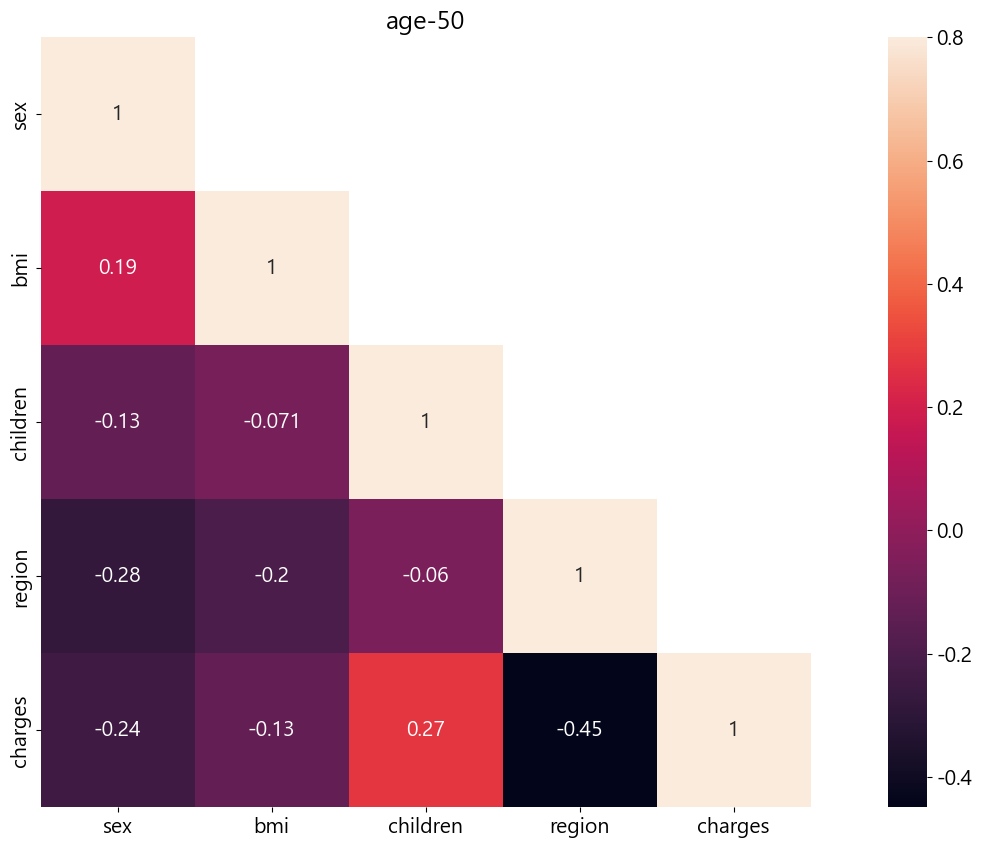

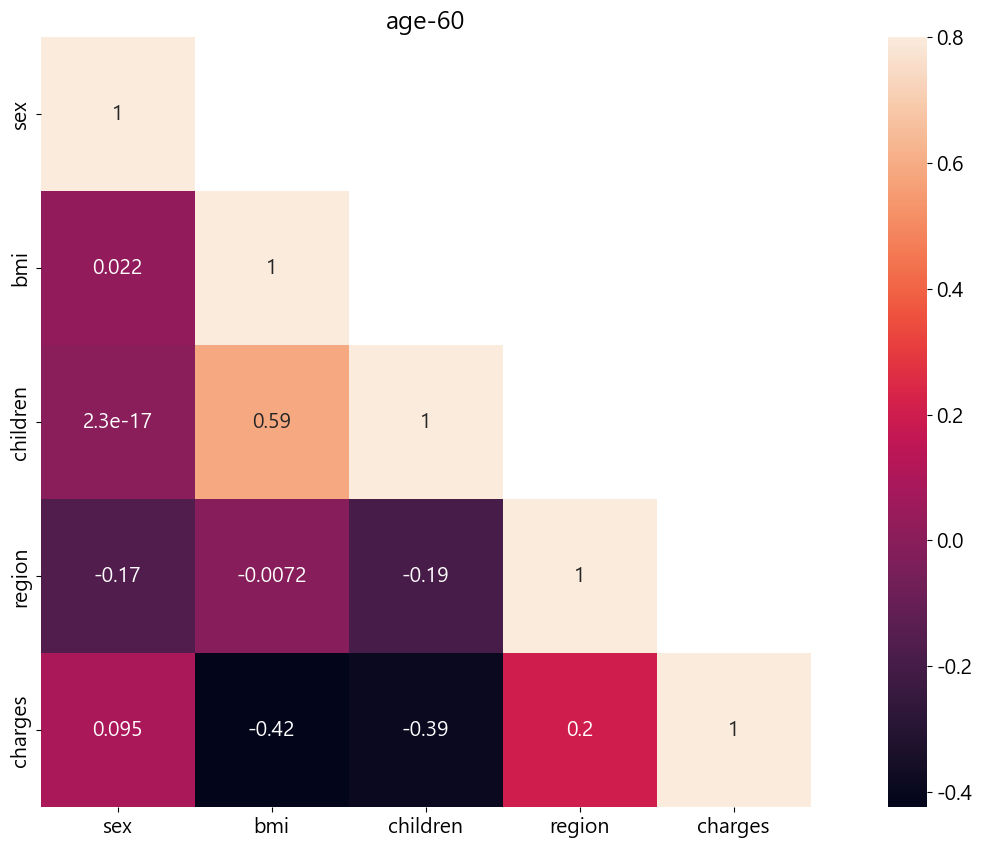

In [105]:
corrplot1_1_1('age')

In [73]:
df_4 = df_2.loc[(df_1['smoker'] == 0) & (df_1['charges'] > 15000)]

In [74]:
def corrplot1_2_1(a): # 이상치 검사, 담배 x, charges가 13000이상일때
    for_list = [a]
    for j in for_dic[for_list[0]]:
        df_2_2 = df_4.loc[df[for_list[0]] == j]
        corrMatt = df_2_2.drop([for_list[0]], axis = 1).corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'1-{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/2-{for_list[0]}-{j}.png', dpi=100)

In [ ]:
corrplot2_1('smoker', 'age')